## Konfigurowanie środowiska 

Aby uruchomić pyspark na komputerze lokalnym, instalujemy Javye oraz odpowiednim Winutils.exe 
następnie instalujemy pyspark i Py4J.

In [1]:
# Polecenie do zainstalowania powyższych pakietów:

! pip install pyspark py4j 

## Tworzenie SparkSession


Przykładowa sesjia SparkSession:

In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local[*]")\
        .appName('PySpark_Tutorial')\
        .getOrCreate()


## Czytanie danych

In [3]:

csv_file = 'Dane.csv'
df = spark.read.csv(csv_file)

## Pobieranie danych za pomocą URL

In [4]:
from pyspark import SparkFiles

spark.sparkContext.addFile('https://storage.covid19datahub.io/level/1.csv')


df = spark.read.csv(SparkFiles.get("1.csv"), header=True)


# Strukturyzacja danych za pomocą schematu Spark

Odczyt danych w formacie pliku CSV:

In [5]:
data = spark.read.csv(
    'Dane.csv',
    sep=',',
    header=True,
)

data.printSchema()

root
 |-- location_id: string (nullable = true)
 |-- location_name: string (nullable = true)
 |-- iso3: string (nullable = true)
 |-- level: string (nullable = true)
 |-- year: string (nullable = true)
 |-- the_total_mean: string (nullable = true)
 |-- the_total_lower: string (nullable = true)
 |-- the_total_upper: string (nullable = true)
 |-- the_total_ppp_mean: string (nullable = true)
 |-- the_total_ppp_lower: string (nullable = true)
 |-- the_total_ppp_upper: string (nullable = true)
 |-- ghes_total_mean: string (nullable = true)
 |-- ghes_total_lower: string (nullable = true)
 |-- ghes_total_upper: string (nullable = true)
 |-- ghes_total_ppp_mean: string (nullable = true)
 |-- ghes_total_ppp_lower: string (nullable = true)
 |-- ghes_total_ppp_upper: string (nullable = true)
 |-- ppp_total_mean: string (nullable = true)
 |-- ppp_total_lower: string (nullable = true)
 |-- ppp_total_upper: string (nullable = true)
 |-- ppp_total_ppp_mean: string (nullable = true)
 |-- ppp_total_ppp

Tworzenie nowej struktury danych:

In [6]:
from pyspark.sql.types import *

data_schema = [
              StructField('location_id', IntegerType(), True),
              StructField('location_name', StringType(), True),
              StructField('iso3', StringType(), True),
              StructField('level', StringType(), True),
              StructField('year', IntegerType(), True),
              StructField('the_total_mean', IntegerType(), True),
              StructField('the_total_lower', IntegerType(), True),
              StructField('the_total_upper', IntegerType(), True),
            ]

final_struc = StructType(fields = data_schema)

data = spark.read.csv(
    'Dane.csv',
    sep=',',
    header=True,
    schema=final_struc 
)

data.printSchema()


root
 |-- location_id: integer (nullable = true)
 |-- location_name: string (nullable = true)
 |-- iso3: string (nullable = true)
 |-- level: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- the_total_mean: integer (nullable = true)
 |-- the_total_lower: integer (nullable = true)
 |-- the_total_upper: integer (nullable = true)



# Różne metody kontroli danych
`schema()`: Ta metoda zwraca schemat danych (ramka danych). Przykład znajduje się poniżej.

In [7]:
data.schema

StructType([StructField('location_id', IntegerType(), True), StructField('location_name', StringType(), True), StructField('iso3', StringType(), True), StructField('level', StringType(), True), StructField('year', IntegerType(), True), StructField('the_total_mean', IntegerType(), True), StructField('the_total_lower', IntegerType(), True), StructField('the_total_upper', IntegerType(), True)])

`dtypes` zwraca listę krotek z nazwami kolumn i typami danych.

In [8]:
data.dtypes

[('location_id', 'int'),
 ('location_name', 'string'),
 ('iso3', 'string'),
 ('level', 'string'),
 ('year', 'int'),
 ('the_total_mean', 'int'),
 ('the_total_lower', 'int'),
 ('the_total_upper', 'int')]

`head(n)` zwraca n wierszy jako listę. Oto przykład:

In [9]:
data.head(3)

[Row(location_id=160, location_name='Afghanistan', iso3='AFG', level='Country', year=1995, the_total_mean=528409, the_total_lower=417121, the_total_upper=665425),
 Row(location_id=160, location_name='Afghanistan', iso3='AFG', level='Country', year=1996, the_total_mean=516915, the_total_lower=412035, the_total_upper=651034),
 Row(location_id=160, location_name='Afghanistan', iso3='AFG', level='Country', year=1997, the_total_mean=509874, the_total_lower=413424, the_total_upper=636436)]

`show()` domyślnie wyświetla pierwsze 20 wierszy, a także przyjmuje liczbę jako parametr określający ich liczbę.

In [10]:
data.show()

+-----------+-------------+----+-------+----+--------------+---------------+---------------+
|location_id|location_name|iso3|  level|year|the_total_mean|the_total_lower|the_total_upper|
+-----------+-------------+----+-------+----+--------------+---------------+---------------+
|        160|  Afghanistan| AFG|Country|1995|        528409|         417121|         665425|
|        160|  Afghanistan| AFG|Country|1996|        516915|         412035|         651034|
|        160|  Afghanistan| AFG|Country|1997|        509874|         413424|         636436|
|        160|  Afghanistan| AFG|Country|1998|        485561|         394629|         605041|
|        160|  Afghanistan| AFG|Country|1999|        463720|         382723|         564170|
|        160|  Afghanistan| AFG|Country|2000|        446201|         372565|         536362|
|        160|  Afghanistan| AFG|Country|2001|        447321|         381894|         524195|
|        160|  Afghanistan| AFG|Country|2002|        534474|         4

`first()` zwraca pierwszy wiersz danych.

In [11]:
data.first()

Row(location_id=160, location_name='Afghanistan', iso3='AFG', level='Country', year=1995, the_total_mean=528409, the_total_lower=417121, the_total_upper=665425)

`take(n)` zwraca pierwsze `n` wierszy.

In [12]:
data.take(2)


[Row(location_id=160, location_name='Afghanistan', iso3='AFG', level='Country', year=1995, the_total_mean=528409, the_total_lower=417121, the_total_upper=665425),
 Row(location_id=160, location_name='Afghanistan', iso3='AFG', level='Country', year=1996, the_total_mean=516915, the_total_lower=412035, the_total_upper=651034)]

`describe()` oblicza niektóre wartości statystyczne dla kolumn liczbowych.


In [13]:
data.describe()

DataFrame[summary: string, location_id: string, location_name: string, iso3: string, level: string, year: string, the_total_mean: string, the_total_lower: string, the_total_upper: string]

`columns` zwraca listę zawierającą nazwy kolumn.


In [14]:
data.columns

['location_id',
 'location_name',
 'iso3',
 'level',
 'year',
 'the_total_mean',
 'the_total_lower',
 'the_total_upper']

`count()` zwraca całkowitą liczbę wierszy w zestawie danych.

In [15]:
data.count()

5232

`differ()` to liczba odmiennych wierszy w używanym zbiorze danych.

In [16]:
#data.differ() 


`printSchema()` wyświetla schemat danych.

In [17]:
data.printSchema()

root
 |-- location_id: integer (nullable = true)
 |-- location_name: string (nullable = true)
 |-- iso3: string (nullable = true)
 |-- level: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- the_total_mean: integer (nullable = true)
 |-- the_total_lower: integer (nullable = true)
 |-- the_total_upper: integer (nullable = true)



# Manipulacja kolumnami

Do dodania kolumny: używamy `withColumn`, aby dodać nową kolumnę do istniejących. Metoda przyjmuje dwa parametry: nazwę kolumny i dane.

In [18]:
data = data.withColumn('location_name_copy', data.location_name)

data.show(5)

+-----------+-------------+----+-------+----+--------------+---------------+---------------+------------------+
|location_id|location_name|iso3|  level|year|the_total_mean|the_total_lower|the_total_upper|location_name_copy|
+-----------+-------------+----+-------+----+--------------+---------------+---------------+------------------+
|        160|  Afghanistan| AFG|Country|1995|        528409|         417121|         665425|       Afghanistan|
|        160|  Afghanistan| AFG|Country|1996|        516915|         412035|         651034|       Afghanistan|
|        160|  Afghanistan| AFG|Country|1997|        509874|         413424|         636436|       Afghanistan|
|        160|  Afghanistan| AFG|Country|1998|        485561|         394629|         605041|       Afghanistan|
|        160|  Afghanistan| AFG|Country|1999|        463720|         382723|         564170|       Afghanistan|
+-----------+-------------+----+-------+----+--------------+---------------+---------------+------------

Aktualizujemy kolumne za pomocą: `withColumnRenamed`, aby zmienić nazwę istniejącej kolumny. Metoda przyjmuje dwa parametry: nazwę istniejącej kolumny i jej nową nazwę. Przykład:

In [19]:
data = data.withColumnRenamed('location_name_copy', 'location_name_changed')

data.show(5)

+-----------+-------------+----+-------+----+--------------+---------------+---------------+---------------------+
|location_id|location_name|iso3|  level|year|the_total_mean|the_total_lower|the_total_upper|location_name_changed|
+-----------+-------------+----+-------+----+--------------+---------------+---------------+---------------------+
|        160|  Afghanistan| AFG|Country|1995|        528409|         417121|         665425|          Afghanistan|
|        160|  Afghanistan| AFG|Country|1996|        516915|         412035|         651034|          Afghanistan|
|        160|  Afghanistan| AFG|Country|1997|        509874|         413424|         636436|          Afghanistan|
|        160|  Afghanistan| AFG|Country|1998|        485561|         394629|         605041|          Afghanistan|
|        160|  Afghanistan| AFG|Country|1999|        463720|         382723|         564170|          Afghanistan|
+-----------+-------------+----+-------+----+--------------+---------------+----

Upuszczanie kolumny: Użyj metody `drop`, która pobiera nazwę kolumny i zwraca dane.

In [20]:
data = data.drop('location_name_changed')

data.show(5)

+-----------+-------------+----+-------+----+--------------+---------------+---------------+
|location_id|location_name|iso3|  level|year|the_total_mean|the_total_lower|the_total_upper|
+-----------+-------------+----+-------+----+--------------+---------------+---------------+
|        160|  Afghanistan| AFG|Country|1995|        528409|         417121|         665425|
|        160|  Afghanistan| AFG|Country|1996|        516915|         412035|         651034|
|        160|  Afghanistan| AFG|Country|1997|        509874|         413424|         636436|
|        160|  Afghanistan| AFG|Country|1998|        485561|         394629|         605041|
|        160|  Afghanistan| AFG|Country|1999|        463720|         382723|         564170|
+-----------+-------------+----+-------+----+--------------+---------------+---------------+
only showing top 5 rows



# Radzenie sobie z brakującymi wartościami
Często napotykamy brakujące wartości podczas pracy z danymi czasu rzeczywistego. Te brakujące wartości są oznaczone jako `NaN`, spacje lub inne symbole zastępcze. Istnieją różne metody radzenia sobie z brakujacymi danymi.

In [21]:
from pyspark.sql import functions as f
data1 = data

## Usuń wiersze z brakującymi wartościami w dowolnej z kolumn
data1.na.drop()

## Zastąp brakujące wartości za pomocą średniej
data1.na.fill(data.select(f.mean(data['the_total_mean'])).collect()[0][0])

## Zastąp brakujące wartości nowymi
#data1.na.replace(old_value, new_vallue)

DataFrame[location_id: int, location_name: string, iso3: string, level: string, year: int, the_total_mean: int, the_total_lower: int, the_total_upper: int]

# Pobieranie danych

### Select
Służy do wybierania jednej lub więcej kolumn przy użyciu ich nazw.

In [22]:
# wybór jednej kolumny
data.select('location_name').show(5)

# wybór kilku kolumn
data.select(['location_name', 'year', 'the_total_mean']).show(5)

+-------------+
|location_name|
+-------------+
|  Afghanistan|
|  Afghanistan|
|  Afghanistan|
|  Afghanistan|
|  Afghanistan|
+-------------+
only showing top 5 rows

+-------------+----+--------------+
|location_name|year|the_total_mean|
+-------------+----+--------------+
|  Afghanistan|1995|        528409|
|  Afghanistan|1996|        516915|
|  Afghanistan|1997|        509874|
|  Afghanistan|1998|        485561|
|  Afghanistan|1999|        463720|
+-------------+----+--------------+
only showing top 5 rows



### Filter
Ta metoda filtruje dane na podstawie określonego warunku. Możesz także określić wiele warunków za pomocą operatorów `AND (&)`, `OR (|)` i `NOT (~)`.

In [23]:
from pyspark.sql.functions import col

data.filter( (col('year') >= 2014) & (col('year') <= 2016) ).show(9)

+-----------+-------------+----+-------+----+--------------+---------------+---------------+
|location_id|location_name|iso3|  level|year|the_total_mean|the_total_lower|the_total_upper|
+-----------+-------------+----+-------+----+--------------+---------------+---------------+
|        160|  Afghanistan| AFG|Country|2014|       1664981|        1541417|        1800126|
|        160|  Afghanistan| AFG|Country|2015|       1822293|        1693212|        1960564|
|        160|  Afghanistan| AFG|Country|2016|       1882415|        1747511|        2028013|
|         43|      Albania| ALB|Country|2014|        707623|         664415|         759515|
|         43|      Albania| ALB|Country|2015|        689829|         646378|         738745|
|         43|      Albania| ALB|Country|2016|        690713|         644271|         738868|
|        139|      Algeria| DZA|Country|2014|       8926232|        8299216|        9529765|
|        139|      Algeria| DZA|Country|2015|       9866905|        91

### Between
Ta metoda zwraca `True`, jeśli testowana wartość należy do określonego zakresu, w przeciwnym razie — `False`.

In [24]:
data.filter(data.the_total_mean.between(1000000, 5000000)).show()

+-----------+-------------+----+-------+----+--------------+---------------+---------------+
|location_id|location_name|iso3|  level|year|the_total_mean|the_total_lower|the_total_upper|
+-----------+-------------+----+-------+----+--------------+---------------+---------------+
|        160|  Afghanistan| AFG|Country|2007|       1040372|         956086|        1141413|
|        160|  Afghanistan| AFG|Country|2008|       1066858|         982415|        1161963|
|        160|  Afghanistan| AFG|Country|2009|       1236730|        1149054|        1337448|
|        160|  Afghanistan| AFG|Country|2010|       1262196|        1166456|        1364153|
|        160|  Afghanistan| AFG|Country|2011|       1373092|        1273961|        1482720|
|        160|  Afghanistan| AFG|Country|2012|       1410474|        1299776|        1525283|
|        160|  Afghanistan| AFG|Country|2013|       1554494|        1435933|        1674751|
|        160|  Afghanistan| AFG|Country|2014|       1664981|        15

### When
Zwraca 0 lub 1 w zależności od określonego warunku.

In [25]:
data.select('location_name', 'the_total_mean', 
            f.when(data.iso3 == 'AFG', 1).otherwise(0)
).show(25)

+-------------+--------------+----------------------------------------+
|location_name|the_total_mean|CASE WHEN (iso3 = AFG) THEN 1 ELSE 0 END|
+-------------+--------------+----------------------------------------+
|  Afghanistan|        528409|                                       1|
|  Afghanistan|        516915|                                       1|
|  Afghanistan|        509874|                                       1|
|  Afghanistan|        485561|                                       1|
|  Afghanistan|        463720|                                       1|
|  Afghanistan|        446201|                                       1|
|  Afghanistan|        447321|                                       1|
|  Afghanistan|        534474|                                       1|
|  Afghanistan|        682593|                                       1|
|  Afghanistan|        806909|                                       1|
|  Afghanistan|        868201|                                  

### Like
Ta metoda jest podobna do operatora Like w SQL. 

In [26]:
data.select(
    'iso3', 
    data.iso3.rlike('^[P,T]').alias('iso3 zaczyba sie na P lub T')
).distinct().show(data.count(),False) 

+----+---------------------------+
|iso3|iso3 zaczyba sie na P lub T|
+----+---------------------------+
|ZAF |false                      |
|CZE |false                      |
|GRL |false                      |
|BEL |false                      |
|SVK |false                      |
|NLD |false                      |
|BDI |false                      |
|COG |false                      |
|SVN |false                      |
|BMU |false                      |
|RUS |false                      |
|MNE |false                      |
|SEN |false                      |
|R4  |false                      |
|ECU |false                      |
|SLB |false                      |
|AUS |false                      |
|IND |false                      |
|UZB |false                      |
|CPV |false                      |
|ISL |false                      |
|BIH |false                      |
|CHN |false                      |
|LSO |false                      |
|MOZ |false                      |
|G   |false         

### GroupBy
Sama nazwa sugeruje, że ta funkcja grupuje dane według wybranej kolumny i wykonuje różne operacje, takie jak obliczanie sumy, średniej, minimalnej, maksymalnej wartości itp.

In [27]:
data.select(['location_name', 'iso3', 'the_total_upper'])\
    .groupBy('iso3')\
    .mean()\
    .show()

+----+--------------------+
|iso3|avg(the_total_upper)|
+----+--------------------+
| NIU|   7513.541666666667|
| HTI|   482741.1666666667|
| PSE|  1439377.3333333333|
| BRB|   336664.2083333333|
| LVA|  1535189.0833333333|
| POL|       2.434388075E7|
| JAM|          812931.375|
| ZMB|   693708.6666666666|
| BRA|     1.04856724375E8|
| ARM|   659695.6666666666|
| MOZ|   551096.6666666666|
| CUB|         8350754.625|
| JOR|          2499192.25|
| FRA|2.5772781633333334E8|
| SOM|   98454.04166666667|
| BRN|            249967.5|
| COD|  1079696.9583333333|
| FSM|  23066.583333333332|
| BOL|  1550184.5833333333|
| URY|  3807072.0833333335|
+----+--------------------+
only showing top 20 rows



### Agregacja
PySpark zapewnia wbudowane standardowe funkcje agregacji zdefiniowane w API DataFrame, które mogą się przydać, gdy musimy zagregować wartości Twoich kolumn. Innymi słowy, takie funkcje działają na kilka wierszy i oblicza pojedynczą wartość powrotną dla każdej grupy.

In [28]:
from pyspark.sql import functions as f

data.filter((col('the_total_upper') >= 1000000) & (col('the_total_upper') <= 5000000))\
    .groupBy("iso3") \
    .agg(f.min("the_total_upper").alias("from"), 
         f.max("the_total_upper").alias("to"), 
         
         f.min("the_total_upper").alias("minimum the_total_upper"),
         f.max("the_total_upper").alias("maximum the_total_upper"), 
         f.avg("the_total_upper").alias("average the_total_upper"), 

         f.min("the_total_lower").alias("minimum the_total_lower"),
         f.max("the_total_lower").alias("maximum the_total_lower"), 
         f.avg("the_total_lower").alias("average the_total_lower"), 

      ).show(truncate=False)

+----+-------+-------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+
|iso3|from   |to     |minimum the_total_upper|maximum the_total_upper|average the_total_upper|minimum the_total_lower|maximum the_total_lower|average the_total_lower|
+----+-------+-------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+
|PSE |1223939|2071988|1223939                |2071988                |1793788.6666666667     |1120275                |1837320                |1646105.9333333333     |
|LVA |1007632|2198799|1007632                |2198799                |1586823.6363636365     |883167                 |2066178                |1468513.2272727273     |
|JAM |1076674|1076674|1076674                |1076674                |1076674.0              |935098                 |935098                 |935098.0               

## Wizualizacja danych
Do wizualizacji danych wykorzystujemy biblioteki `matplotlib` i `pandas`. Metoda `toPandas()` umożliwia nam przekształcenie danych w ramkę danych pandas, której używamy, gdy wywołujemy metodę renderowania `plot()`. 

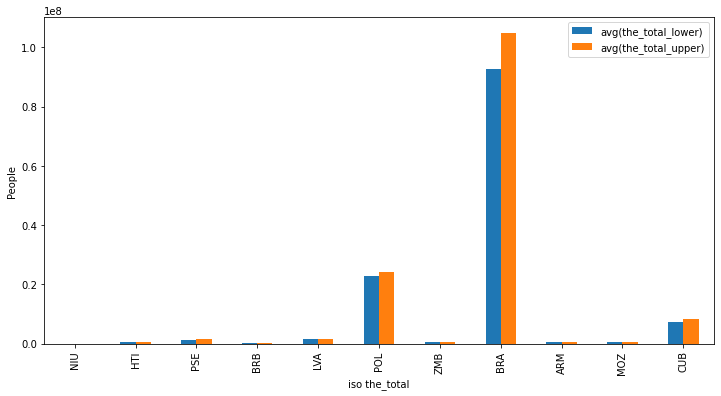

In [29]:
from matplotlib import pyplot as plt

currency_df =  data.select(['iso3', 
                       'the_total_lower', 
                       'the_total_upper', 
                       ]
                     )\
                     .groupBy('iso3')\
                     .mean()\
                     .toPandas()

ind = list(range(12))
ind.pop(6)

currency_df.iloc[ind ,:].plot(kind='bar', x='iso3', y=currency_df.columns.tolist()[1:], 
                         figsize=(12, 6), ylabel='People', xlabel='iso the_total')
plt.show()

## Zapisywanie/zapisywanie danych do pliku
Metoda `write.save()` służy do zapisywania danych w różnych formatach, takich jak CSV, JSVON, Parquet i inne. 

In [30]:
# CSV
data.write.csv('dataset.csv')

# JSON
data.write.save('dataset.json', format='json')

# Parquet
data.write.save('dataset.parquet', format='parquet')

# Zapisywanie wybranych kolumn

# CSV
data.select(['location_name','iso3','year','the_total_mean','the_total_lower','the_total_upper'])\
    .write.csv('dataset_1.csv')

# JSON
data.select(['location_name','iso3','year','the_total_mean','the_total_lower','the_total_upper'])\
    .write.save('dataset_1.json', format='json')

# Parquet
data.select(['location_name','iso3','year','the_total_mean','the_total_lower','the_total_upper'])\
    .write.save('dataset_1.parquet', format='parquet')

Py4JJavaError: An error occurred while calling o200.csv.
: org.apache.spark.SparkException: Job aborted.
	at org.apache.spark.sql.errors.QueryExecutionErrors$.jobAbortedError(QueryExecutionErrors.scala:651)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.write(FileFormatWriter.scala:278)
	at org.apache.spark.sql.execution.datasources.InsertIntoHadoopFsRelationCommand.run(InsertIntoHadoopFsRelationCommand.scala:186)
	at org.apache.spark.sql.execution.command.DataWritingCommandExec.sideEffectResult$lzycompute(commands.scala:113)
	at org.apache.spark.sql.execution.command.DataWritingCommandExec.sideEffectResult(commands.scala:111)
	at org.apache.spark.sql.execution.command.DataWritingCommandExec.executeCollect(commands.scala:125)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.$anonfun$applyOrElse$1(QueryExecution.scala:98)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$6(SQLExecution.scala:109)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:169)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:95)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:779)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:64)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.applyOrElse(QueryExecution.scala:98)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.applyOrElse(QueryExecution.scala:94)
	at org.apache.spark.sql.catalyst.trees.TreeNode.$anonfun$transformDownWithPruning$1(TreeNode.scala:584)
	at org.apache.spark.sql.catalyst.trees.CurrentOrigin$.withOrigin(TreeNode.scala:176)
	at org.apache.spark.sql.catalyst.trees.TreeNode.transformDownWithPruning(TreeNode.scala:584)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.org$apache$spark$sql$catalyst$plans$logical$AnalysisHelper$$super$transformDownWithPruning(LogicalPlan.scala:30)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper.transformDownWithPruning(AnalysisHelper.scala:267)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper.transformDownWithPruning$(AnalysisHelper.scala:263)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.transformDownWithPruning(LogicalPlan.scala:30)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.transformDownWithPruning(LogicalPlan.scala:30)
	at org.apache.spark.sql.catalyst.trees.TreeNode.transformDown(TreeNode.scala:560)
	at org.apache.spark.sql.execution.QueryExecution.eagerlyExecuteCommands(QueryExecution.scala:94)
	at org.apache.spark.sql.execution.QueryExecution.commandExecuted$lzycompute(QueryExecution.scala:81)
	at org.apache.spark.sql.execution.QueryExecution.commandExecuted(QueryExecution.scala:79)
	at org.apache.spark.sql.execution.QueryExecution.assertCommandExecuted(QueryExecution.scala:116)
	at org.apache.spark.sql.DataFrameWriter.runCommand(DataFrameWriter.scala:860)
	at org.apache.spark.sql.DataFrameWriter.saveToV1Source(DataFrameWriter.scala:390)
	at org.apache.spark.sql.DataFrameWriter.saveInternal(DataFrameWriter.scala:363)
	at org.apache.spark.sql.DataFrameWriter.save(DataFrameWriter.scala:239)
	at org.apache.spark.sql.DataFrameWriter.csv(DataFrameWriter.scala:851)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:829)
Caused by: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 39.0 failed 1 times, most recent failure: Lost task 0.0 in stage 39.0 (TID 31) (V2 executor driver): java.io.IOException: (null) entry in command string: null chmod 0644 C:\Users\Ricoss\Desktop\EIWD\Lab3\dataset.csv\_temporary\0\_temporary\attempt_202301031807473392497254353431617_0039_m_000000_31\part-00000-90902943-63cb-4c8d-8813-7cc7270bd1a0-c000.csv
	at org.apache.hadoop.util.Shell$ShellCommandExecutor.execute(Shell.java:773)
	at org.apache.hadoop.util.Shell.execCommand(Shell.java:869)
	at org.apache.hadoop.util.Shell.execCommand(Shell.java:852)
	at org.apache.hadoop.fs.RawLocalFileSystem.setPermission(RawLocalFileSystem.java:733)
	at org.apache.hadoop.fs.RawLocalFileSystem$LocalFSFileOutputStream.<init>(RawLocalFileSystem.java:225)
	at org.apache.hadoop.fs.RawLocalFileSystem$LocalFSFileOutputStream.<init>(RawLocalFileSystem.java:209)
	at org.apache.hadoop.fs.RawLocalFileSystem.createOutputStreamWithMode(RawLocalFileSystem.java:307)
	at org.apache.hadoop.fs.RawLocalFileSystem.create(RawLocalFileSystem.java:296)
	at org.apache.hadoop.fs.RawLocalFileSystem.create(RawLocalFileSystem.java:328)
	at org.apache.hadoop.fs.ChecksumFileSystem$ChecksumFSOutputSummer.<init>(ChecksumFileSystem.java:398)
	at org.apache.hadoop.fs.ChecksumFileSystem.create(ChecksumFileSystem.java:461)
	at org.apache.hadoop.fs.ChecksumFileSystem.create(ChecksumFileSystem.java:440)
	at org.apache.hadoop.fs.FileSystem.create(FileSystem.java:911)
	at org.apache.hadoop.fs.FileSystem.create(FileSystem.java:892)
	at org.apache.hadoop.fs.FileSystem.create(FileSystem.java:789)
	at org.apache.spark.sql.execution.datasources.CodecStreams$.createOutputStream(CodecStreams.scala:81)
	at org.apache.spark.sql.execution.datasources.CodecStreams$.createOutputStreamWriter(CodecStreams.scala:92)
	at org.apache.spark.sql.execution.datasources.csv.CsvOutputWriter.<init>(CsvOutputWriter.scala:38)
	at org.apache.spark.sql.execution.datasources.csv.CSVFileFormat$$anon$1.newInstance(CSVFileFormat.scala:84)
	at org.apache.spark.sql.execution.datasources.SingleDirectoryDataWriter.newOutputWriter(FileFormatDataWriter.scala:161)
	at org.apache.spark.sql.execution.datasources.SingleDirectoryDataWriter.<init>(FileFormatDataWriter.scala:146)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.executeTask(FileFormatWriter.scala:317)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.$anonfun$write$21(FileFormatWriter.scala:256)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:136)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:548)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1504)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:551)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	at java.base/java.lang.Thread.run(Thread.java:829)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2672)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2608)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2607)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2607)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1182)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1182)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1182)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2860)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2802)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2791)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:952)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2228)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.write(FileFormatWriter.scala:245)
	... 42 more
Caused by: java.io.IOException: (null) entry in command string: null chmod 0644 C:\Users\Ricoss\Desktop\EIWD\Lab3\dataset.csv\_temporary\0\_temporary\attempt_202301031807473392497254353431617_0039_m_000000_31\part-00000-90902943-63cb-4c8d-8813-7cc7270bd1a0-c000.csv
	at org.apache.hadoop.util.Shell$ShellCommandExecutor.execute(Shell.java:773)
	at org.apache.hadoop.util.Shell.execCommand(Shell.java:869)
	at org.apache.hadoop.util.Shell.execCommand(Shell.java:852)
	at org.apache.hadoop.fs.RawLocalFileSystem.setPermission(RawLocalFileSystem.java:733)
	at org.apache.hadoop.fs.RawLocalFileSystem$LocalFSFileOutputStream.<init>(RawLocalFileSystem.java:225)
	at org.apache.hadoop.fs.RawLocalFileSystem$LocalFSFileOutputStream.<init>(RawLocalFileSystem.java:209)
	at org.apache.hadoop.fs.RawLocalFileSystem.createOutputStreamWithMode(RawLocalFileSystem.java:307)
	at org.apache.hadoop.fs.RawLocalFileSystem.create(RawLocalFileSystem.java:296)
	at org.apache.hadoop.fs.RawLocalFileSystem.create(RawLocalFileSystem.java:328)
	at org.apache.hadoop.fs.ChecksumFileSystem$ChecksumFSOutputSummer.<init>(ChecksumFileSystem.java:398)
	at org.apache.hadoop.fs.ChecksumFileSystem.create(ChecksumFileSystem.java:461)
	at org.apache.hadoop.fs.ChecksumFileSystem.create(ChecksumFileSystem.java:440)
	at org.apache.hadoop.fs.FileSystem.create(FileSystem.java:911)
	at org.apache.hadoop.fs.FileSystem.create(FileSystem.java:892)
	at org.apache.hadoop.fs.FileSystem.create(FileSystem.java:789)
	at org.apache.spark.sql.execution.datasources.CodecStreams$.createOutputStream(CodecStreams.scala:81)
	at org.apache.spark.sql.execution.datasources.CodecStreams$.createOutputStreamWriter(CodecStreams.scala:92)
	at org.apache.spark.sql.execution.datasources.csv.CsvOutputWriter.<init>(CsvOutputWriter.scala:38)
	at org.apache.spark.sql.execution.datasources.csv.CSVFileFormat$$anon$1.newInstance(CSVFileFormat.scala:84)
	at org.apache.spark.sql.execution.datasources.SingleDirectoryDataWriter.newOutputWriter(FileFormatDataWriter.scala:161)
	at org.apache.spark.sql.execution.datasources.SingleDirectoryDataWriter.<init>(FileFormatDataWriter.scala:146)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.executeTask(FileFormatWriter.scala:317)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.$anonfun$write$21(FileFormatWriter.scala:256)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:136)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:548)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1504)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:551)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	... 1 more
